In [1]:
# Essential libraries for data manipulation, visualization, and machine learning
import os
import pandas as pd  # For data handling
import numpy as np   # For numerical operations
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # Plotting library

# Sklearn tools for machine learning and preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import preprocessing  # Additional preprocessing tools

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
import os  # For handling file paths

# Load training and testing datasets
train_dataset = pd.read_csv(os.path.join('Data', 'train.csv'))
test_dataset = pd.read_csv(os.path.join('Data', 'test.csv'))


In [5]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
train_dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train_dataset.columns[train_dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
test_dataset.columns[test_dataset.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [12]:
train_dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
# Handle missing values in the training dataset
train_dataset.fillna(method='bfill', inplace=True)  # Backward fill for NaN values
train_dataset.fillna(method='ffill', inplace=True)  # Forward fill remaining NaNs

# Handle missing values in the testing dataset
test_dataset.fillna(method='bfill', inplace=True)   # Backward fill for NaN values
test_dataset.fillna(method='ffill', inplace=True)   # Forward fill remaining NaNs


In [14]:
train_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Pave,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,0,4,2010,WD,Normal,142125


In [15]:
train_dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [16]:
train_dataset.columns[train_dataset.isnull().any()]

Index([], dtype='object')

In [17]:
test_dataset.columns[test_dataset.isnull().any()]

Index([], dtype='object')

In [18]:
test_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Pave,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Gar2,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Pave,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Pave,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Pave,IR1,Lvl,AllPub,...,0,0,Ex,GdPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Pave,IR1,HLS,AllPub,...,144,0,Ex,GdPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,700,7,2006,WD,Normal


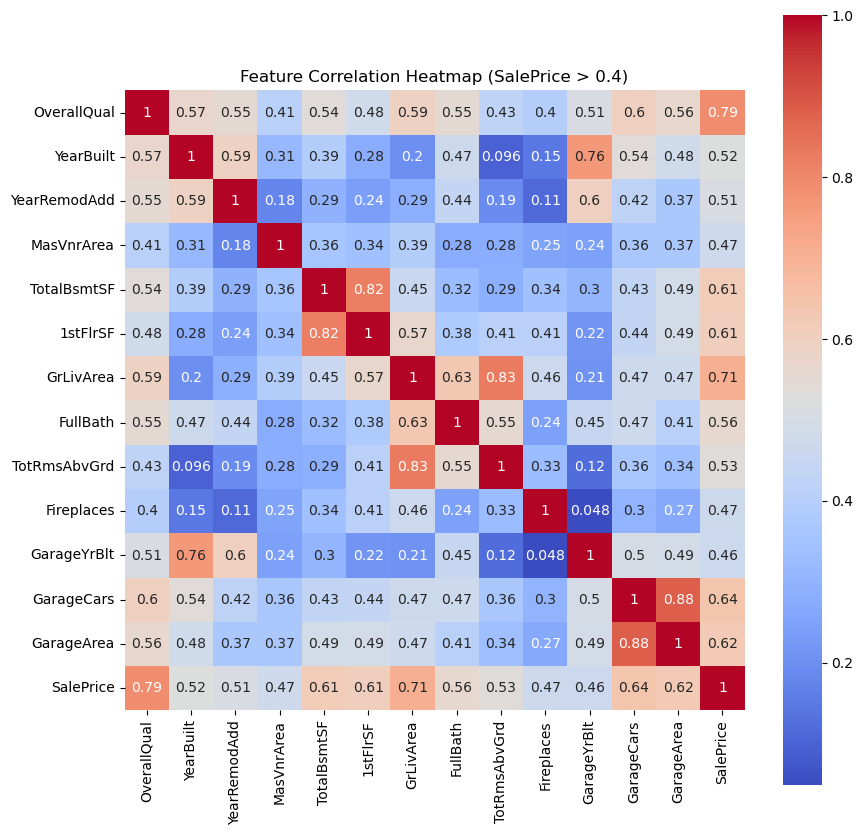

In [19]:
# Selecting only numeric columns from the training data
numeric_columns = train_dataset.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric data
correlation_matrix = numeric_columns.corr()
highly_correlated_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"]) > 0.4]

# Plot a heatmap to visualize correlations above 0.4 threshold
plt.figure(figsize=(10, 10))
correlation_heatmap = sns.heatmap(
    numeric_columns[highly_correlated_features].corr(), 
    annot=True, 
    cmap="coolwarm",  # Changed color palette
    square=True       # Adds a square grid for visual clarity
)
plt.title("Feature Correlation Heatmap (SalePrice > 0.4)")
plt.show()


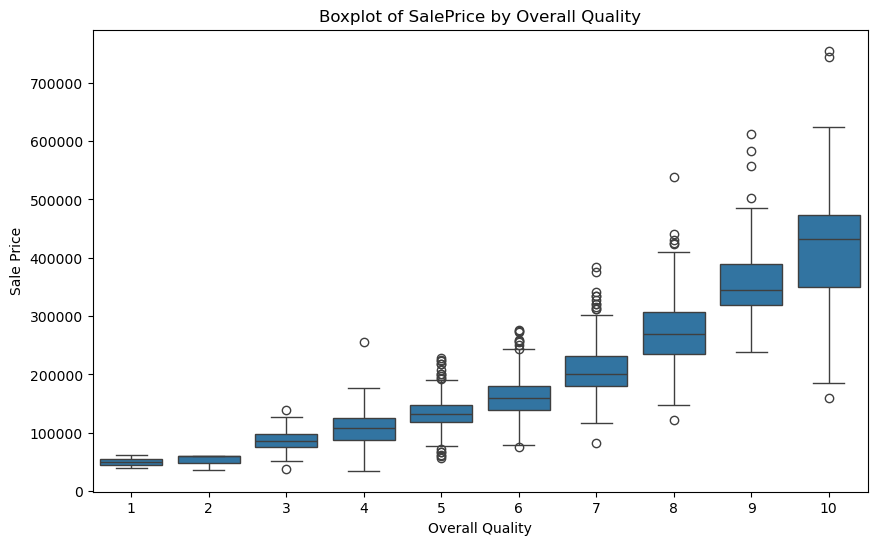

In [20]:
# Plotting the relationship between Overall Quality and Sale Price using a boxplot
plt.figure(figsize=(10, 6))  # Set figure size for the plot
sns.boxplot(x='OverallQual', y='SalePrice', data=train_dataset)  # Boxplot for Overall Quality vs Sale Price

# Adding title and labels to make the plot more informative
plt.title('Boxplot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()  # Display the plot


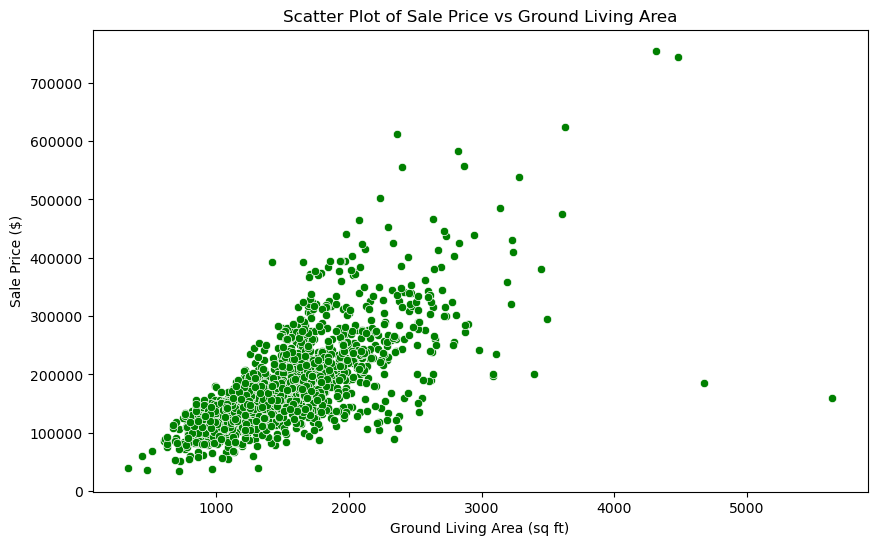

In [21]:
# Scatter plot to explore the relationship between Ground Living Area and Sale Price
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_dataset, color='green', marker='o')  # Scatter plot with green markers

# Adding title and axis labels for better clarity
plt.title('Scatter Plot of Sale Price vs Ground Living Area')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()  # Display the plot


In [22]:
# Removing outliers based on GrLivArea and SalePrice thresholds
outlier_condition = (train_dataset['GrLivArea'] > 4000) & (train_dataset['SalePrice'] > 300000)

# Drop rows that meet the outlier condition
train_dataset = train_dataset.drop(train_dataset[outlier_condition].index)

# Print the shape after removing outliers to verify the change
print(f"Data shape after removing outliers: {train_dataset.shape}")


Data shape after removing outliers: (1458, 81)


In [23]:
# Displaying the first few rows of the training dataset
train_dataset.head()  # Shows the top 5 rows of the dataset for inspection


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [24]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   object 
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   object 
 6   Alley          1458 non-null   object 
 7   LotShape       1458 non-null   object 
 8   LandContour    1458 non-null   object 
 9   Utilities      1458 non-null   object 
 10  LotConfig      1458 non-null   object 
 11  LandSlope      1458 non-null   object 
 12  Neighborhood   1458 non-null   object 
 13  Condition1     1458 non-null   object 
 14  Condition2     1458 non-null   object 
 15  BldgType       1458 non-null   object 
 16  HouseStyle     1458 non-null   object 
 17  OverallQual    1458 non-null   int64  
 18  OverallCond  

In [25]:
# Initialize the LabelEncoder for encoding categorical variables
label_encoder = preprocessing.LabelEncoder()

# Function to encode categorical columns in the dataframe
def encode_categorical_columns(dataframe):
    # Select all columns with object data type (categorical variables)
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        # Apply Label Encoding to each categorical column
        dataframe[column] = label_encoder.fit_transform(dataframe[column])

# Encoding categorical columns in the training dataset
encode_categorical_columns(train_dataset)

# Encoding categorical columns in the testing dataset
encode_categorical_columns(test_dataset)


In [26]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   int32  
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   int32  
 6   Alley          1458 non-null   int32  
 7   LotShape       1458 non-null   int32  
 8   LandContour    1458 non-null   int32  
 9   Utilities      1458 non-null   int32  
 10  LotConfig      1458 non-null   int32  
 11  LandSlope      1458 non-null   int32  
 12  Neighborhood   1458 non-null   int32  
 13  Condition1     1458 non-null   int32  
 14  Condition2     1458 non-null   int32  
 15  BldgType       1458 non-null   int32  
 16  HouseStyle     1458 non-null   int32  
 17  OverallQual    1458 non-null   int64  
 18  OverallCond  

In [27]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int32  
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int32  
 6   Alley          1459 non-null   int32  
 7   LotShape       1459 non-null   int32  
 8   LandContour    1459 non-null   int32  
 9   Utilities      1459 non-null   int32  
 10  LotConfig      1459 non-null   int32  
 11  LandSlope      1459 non-null   int32  
 12  Neighborhood   1459 non-null   int32  
 13  Condition1     1459 non-null   int32  
 14  Condition2     1459 non-null   int32  
 15  BldgType       1459 non-null   int32  
 16  HouseStyle     1459 non-null   int32  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [28]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Prepare the training data and target variable
training_data = train_dataset
X_train = training_data.drop("SalePrice", axis=1)  # Features
y_train = training_data["SalePrice"]  # Target variable (SalePrice)

# Test data
test_features = test_dataset  # Features for the test dataset

# Fit the model using the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test dataset
predictions = linear_model.predict(test_features)


In [30]:
# Make predictions on the test dataset using the trained model
predicted_values = linear_model.predict(test_dataset)  # Predictions for the test dataset


In [31]:
# Predictions from the trained model on the test dataset
test_predictions = linear_model.predict(test_dataset)  # Predicted values for the test set


In [32]:
# Create a DataFrame with predicted SalePrice values and corresponding Ids
predictions_output = pd.DataFrame({
    'Id': test_dataset['Id'],  # ID from the test dataset
    'SalePrice': predicted_values  # Predicted sale prices
})

# Display the output DataFrame
print(predictions_output)


        Id      SalePrice
0     1461  118561.628576
1     1462  158532.150539
2     1463  169039.385197
3     1464  193995.598522
4     1465  192981.947879
...    ...            ...
1454  2915   68268.272135
1455  2916   59877.796761
1456  2917  150747.692300
1457  2918  123267.242967
1458  2919  249981.653574

[1459 rows x 2 columns]


In [33]:
# Save the predictions output to a CSV file for future reference
predictions_output.to_csv("Predicted_House_Prices.csv", index=False)

# Notify completion of the task
print("House Price Predictions have been successfully saved!")


House Price Predictions have been successfully saved!
